In [1]:
import pandas as pd
import geopandas as gpd

import os

from spineq.data_fetcher import (
    extract_la_data,
    get_la_shape,
    get_oa_shapes,
    lad20nm_to_lad20cd,
    get_oa_centroids,
    get_oa_stats,
)

import contextily as ctx
import matplotlib.pyplot as plt

%matplotlib inline

## Local Authority District to Display

In [2]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

## Download Data

In [3]:
print(f"{lad20nm} ({lad20cd})")
extract_la_data(lad20cd)

/Users/jroberts/opt/anaconda3/envs/spatial-inequality/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Newcastle upon Tyne (E08000021)
LA shape: 1 rows
OA in this LA (mappings): 910 rows


/Users/jroberts/GitHub/spatial-inequality/spineq/data_fetcher.py:363: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  oa = download_oa_shape(lad11cd=lad11cd, overwrite=overwrite)


OA shapes: 910 rows
Centroids: 910 rows
Total Population: 910 rows
Population by Age: 910 rows
Place of Work: 910 rows
Urban Observatory Sensors: 145 rows


## Local Authority Boundary

lad20cd                                             E08000021
lad20nm                                   Newcastle upon Tyne
geometry    POLYGON ((422592.3991 576160.0953, 422728.4014...
Name: 0, dtype: object

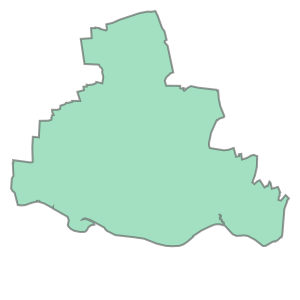

In [4]:
la = get_la_shape(lad20cd)
display(la.head())
la["geometry"]

## Output Areas Boundaries

In [5]:
oa = get_oa_shapes(lad20cd)
oa.head()

,geometry
oa11cd,
E00042042,"POLYGON ((421176.250 564469.753, 421177.231 56..."
E00042043,"POLYGON ((420510.000 564944.000, 420572.364 56..."
E00042044,"POLYGON ((420365.325 564561.637, 420438.986 56..."
E00042045,"POLYGON ((421543.715 563955.116, 421503.886 56..."
E00042046,"POLYGON ((422200.279 563353.233, 422078.508 56..."


(413669.7082000001, 430906.26379999996, 562239.7236999996, 576823.0023000002)

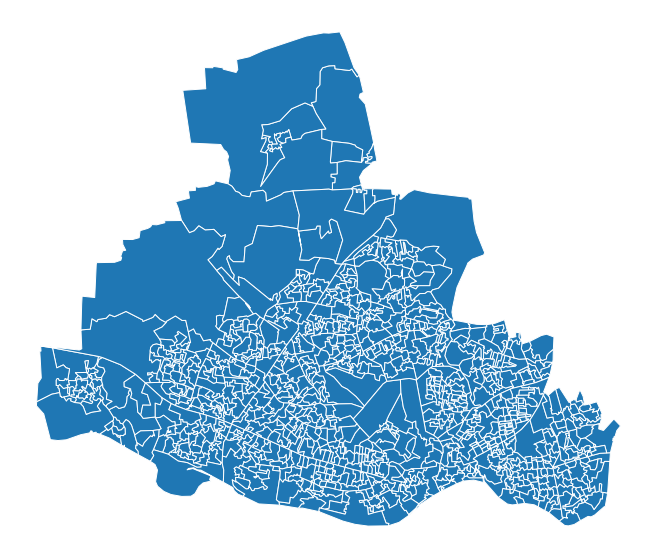

In [6]:
oa.plot(figsize=(20, 10), edgecolor="white")
plt.axis("off")

## With a base map (contextily)

https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html

Alternative map tiles:
https://wiki.openstreetmap.org/wiki/Tile_servers

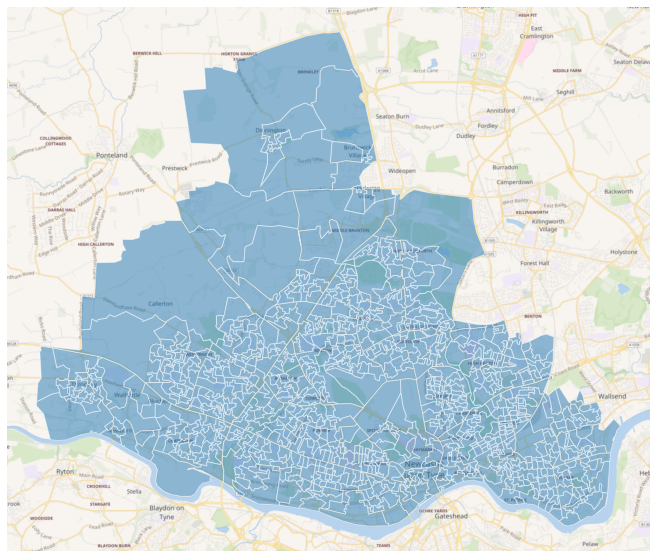

In [7]:
ax = oa.plot(figsize=(20, 10), alpha=0.5, edgecolor="white")
ctx.add_basemap(
    ax, source="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png", crs=oa.crs
)
ax.set_axis_off()

## Population Centroids

In [8]:
centroids = get_oa_centroids(lad20cd)
centroids.head()

,x,y
oa11cd,,
E00042665,425731.0,564928.0
E00042671,425558.0,564791.0
E00042592,423584.0,564313.0
E00042812,423312.0,563534.0
E00042661,425561.0,564849.0


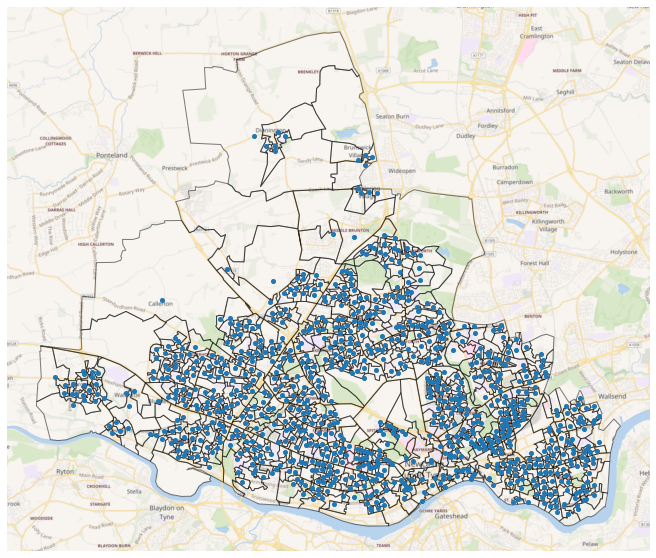

In [9]:
ax = oa.plot(figsize=(20, 10), alpha=0.5, edgecolor="black", facecolor="None")
ctx.add_basemap(
    ax, source="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png", crs=oa.crs
)
ax.set_axis_off()
plt.plot(centroids["x"], centroids["y"], linestyle="None", marker="o", markersize=4)

## Population Estimates

In [10]:
population_total = pd.read_csv(
    f"../data/processed/{lad20cd}/population_total.csv", index_col="oa11cd"
)
oa = oa.merge(population_total, left_index=True, right_index=True)

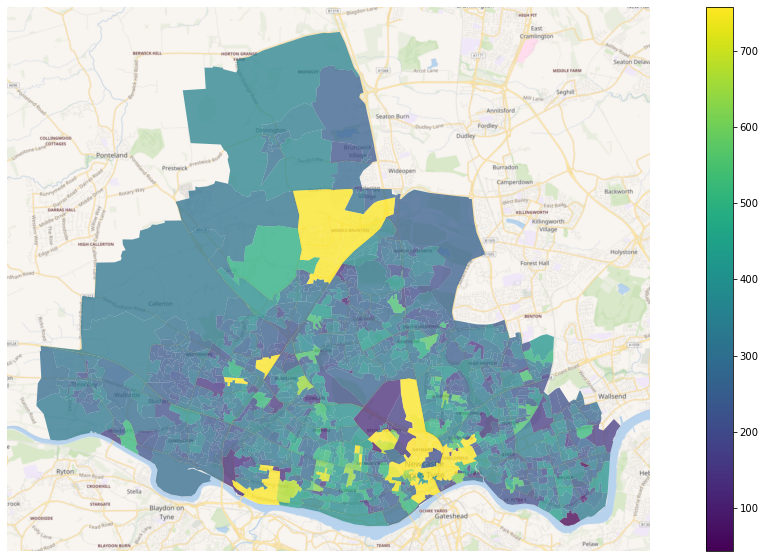

In [11]:
ax = oa.plot(
    column="population",
    figsize=(20, 10),
    alpha=0.75,
    cmap="viridis",
    legend=True,
    vmax=oa["population"].quantile(0.975),
)
ctx.add_basemap(
    ax, source="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png", crs=oa.crs
)
ax.set_axis_off()

## Density

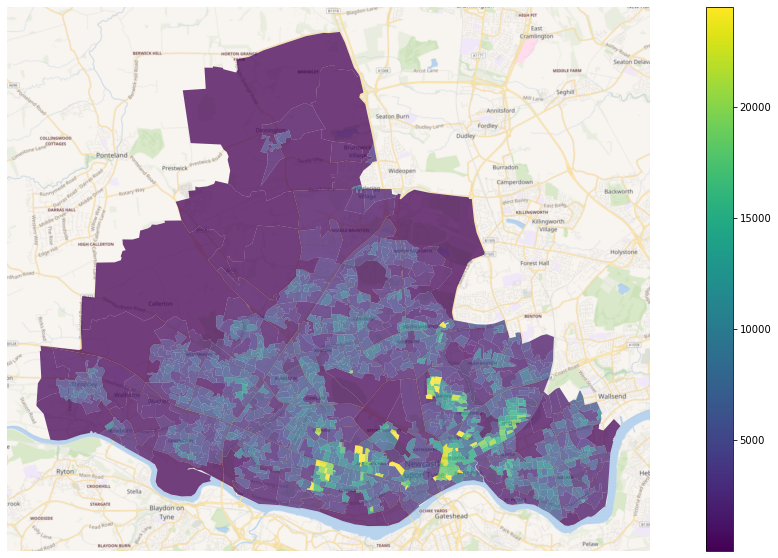

In [12]:
oa["area"] = oa["geometry"].area / 10**6
oa["density"] = oa["population"] / oa["area"]
ax = oa.plot(
    column="density",
    figsize=(20, 10),
    alpha=0.75,
    cmap="viridis",
    legend=True,
    vmax=oa["density"].quantile(0.975),
)
ctx.add_basemap(
    ax, source="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png", crs=oa.crs
)
ax.set_axis_off()